<!-- Provide a brief justification (3-4 lines) for why this dataset is suit-
able for weather-related analysis and predictions on a global scale. -->

# Data Processing
## Data Loading

In [838]:
# Imports.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pycountry_convert as pc

#warnings
import warnings
warnings.filterwarnings(action='ignore')


In [839]:
# Loading the Global Weather Dataset.

df = pd.read_csv('/Users/diegolemos/Masters/ProgrammingForAi/CA/GlobalWeatherRepository.csv')

In [840]:
# Getting the informations from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30291 entries, 0 to 30290
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       30291 non-null  object 
 1   location_name                 30291 non-null  object 
 2   latitude                      30291 non-null  float64
 3   longitude                     30291 non-null  float64
 4   timezone                      30291 non-null  object 
 5   last_updated_epoch            30291 non-null  int64  
 6   last_updated                  30291 non-null  object 
 7   temperature_celsius           30291 non-null  float64
 8   temperature_fahrenheit        30291 non-null  float64
 9   condition_text                30291 non-null  object 
 10  wind_mph                      30291 non-null  float64
 11  wind_kph                      30291 non-null  float64
 12  wind_degree                   30291 non-null  int64  
 13  w

## Reading the data set

In [841]:
# Reading the 5 first rows of the dataset
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [842]:
# Cheking the number of features and observations.
df.shape

(30291, 41)

As we can see there are 30291 observations and 41 features in the dataset.

## Missing Values

In [843]:
# Checking for missing values.

df.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

There is no missing values in the dataset.

## Duplicates

In [844]:
# Checking the duplicates.

df.duplicated().sum()

0

The are no duplicated rows.

## Unique Values

In [845]:
# Checking uniques values.
df.nunique()

country                          210
location_name                    248
latitude                         383
longitude                        389
timezone                         190
last_updated_epoch               211
last_updated                    4424
temperature_celsius              489
temperature_fahrenheit           815
condition_text                    34
wind_mph                         147
wind_kph                         147
wind_degree                      360
wind_direction                    16
pressure_mb                       65
pressure_in                      160
precip_mm                        442
precip_in                         53
humidity                          99
cloud                            101
feels_like_celsius               551
feels_like_fahrenheit            949
visibility_km                     60
visibility_miles                  13
uv_index                         143
gust_mph                         441
gust_kph                         662
a

According to the *nunique* function, the amount of countries is 210. However, there are only 195 contries in the world.(Worldometer, 2019)
Considering this, I will perform an analisys in this column. 

In [846]:
# Checking the unique country names.
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Madagascar', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Comoros',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Swaziland', 'Ethiopia', 'Fiji Islands', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau

I noticed there are same countries written in different languages, for instance "Belgium" and "Bélgica". Thus, I will perform a standardization.

## Standardization

In [847]:
# Creating a dictionary to map inconsistent country names to standard country names

country_standardize_map = {
    "Bélgica": "Belgium",
    "Estonie": "Estonia",
    "Malásia": "Malaysia",
    "Marrocos": "Morocco",
    "Mexique": "Mexico",
    "Polônia": "Poland",
    "Südkorea": "South Korea",
    "Saudi Arabien": "Saudi Arabia",
    "Inde": "India",
    "Jemen": "Yemen",
    "Letonia": "Latvia",
    "Komoren": "Comoros",
    "Польша": "Poland",
    "Турция": "Turkey",
    "كولومبيا": "Colombia",
    "火鸡": "Turkey",
    "USA United States of America": "United States of America",
    "Гватемала": "Guatemala"
}

# Replacing inconsistent country names
df['country'] = df['country'].replace(country_standardize_map)


In [848]:
# Checkinh the amount of unique country names again.
df['country'].nunique()

192

Now, after standardazing the country names, we have the correct amount of countries in the dataset.

In [849]:
# Checking the columns data types.

print(df.dtypes)

country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64
uv_index                        float64


Based on the information above, I will drop a few columns with either, redundant or irrelevant data for the analysis. For the feature 'last_updated' as its datatype is object, I will convert it to date type. 

## Dropping Columns

In [850]:
# Dropping columns
df = df.drop(['location_name','timezone', 'last_updated_epoch','sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination', 'wind_direction', 'condition_text'], axis=1)

In [851]:
# Reading the 5 first rows of the new dataset
df.head()

,country,latitude,longitude,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,...,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
0,Afghanistan,34.52,69.18,2024-05-16 13:15,26.6,79.8,8.3,13.3,338,1012.0,...,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1
1,Albania,41.33,19.82,2024-05-16 10:45,19.0,66.2,6.9,11.2,320,1012.0,...,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1
2,Algeria,36.76,3.05,2024-05-16 09:45,23.0,73.4,9.4,15.1,280,1011.0,...,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1
3,Andorra,42.50,1.52,2024-05-16 10:45,6.3,43.3,7.4,11.9,215,1007.0,...,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1
4,Angola,-8.84,13.23,2024-05-16 09:45,26.0,78.8,8.1,13.0,150,1011.0,...,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10


## Converting Datatype

In [852]:
# Converting the column 'last_updated' to datetype
df['last_updated'] = pd.to_datetime(df['last_updated'])

In [853]:
# Checkint if the datatype of he column 'last_updated' was changed
print(df['last_updated'].dtype)

datetime64[ns]


## Encoding

I will perform an Label Enconding in the 'country' feature. I chose to proceed with this method as the One-Hot Encode method would generate many other columns, making the dataset too extense. (Micheal, 2023)

In [854]:
# Applying the encode method to the 'country' column
label_encoder = LabelEncoder()

df['country_encoded'] = label_encoder.fit_transform(df['country'])

print(df[['country', 'country_encoded']].head())

       country  country_encoded
0  Afghanistan                0
1      Albania                1
2      Algeria                2
3      Andorra                3
4       Angola                4


In [855]:
# Printting the first 5 rows to see how is the data frame after the enconding 
df.head()

,country,latitude,longitude,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,country_encoded
0,Afghanistan,34.52,69.18,2024-05-16 13:15:00,26.6,79.8,8.3,13.3,338,1012.0,...,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,0
1,Albania,41.33,19.82,2024-05-16 10:45:00,19.0,66.2,6.9,11.2,320,1012.0,...,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,1
2,Algeria,36.76,3.05,2024-05-16 09:45:00,23.0,73.4,9.4,15.1,280,1011.0,...,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,2
3,Andorra,42.50,1.52,2024-05-16 10:45:00,6.3,43.3,7.4,11.9,215,1007.0,...,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,3
4,Angola,-8.84,13.23,2024-05-16 09:45:00,26.0,78.8,8.1,13.0,150,1011.0,...,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,4


In [856]:
# Saving the 'country' column in a different variable to reutilize later
country_column = df['country']

In [857]:
#Nominating a new df without column 'country' to be able to plot the heatmap
df_hot_enconded = df.drop('country', axis =1)

## Heatmap

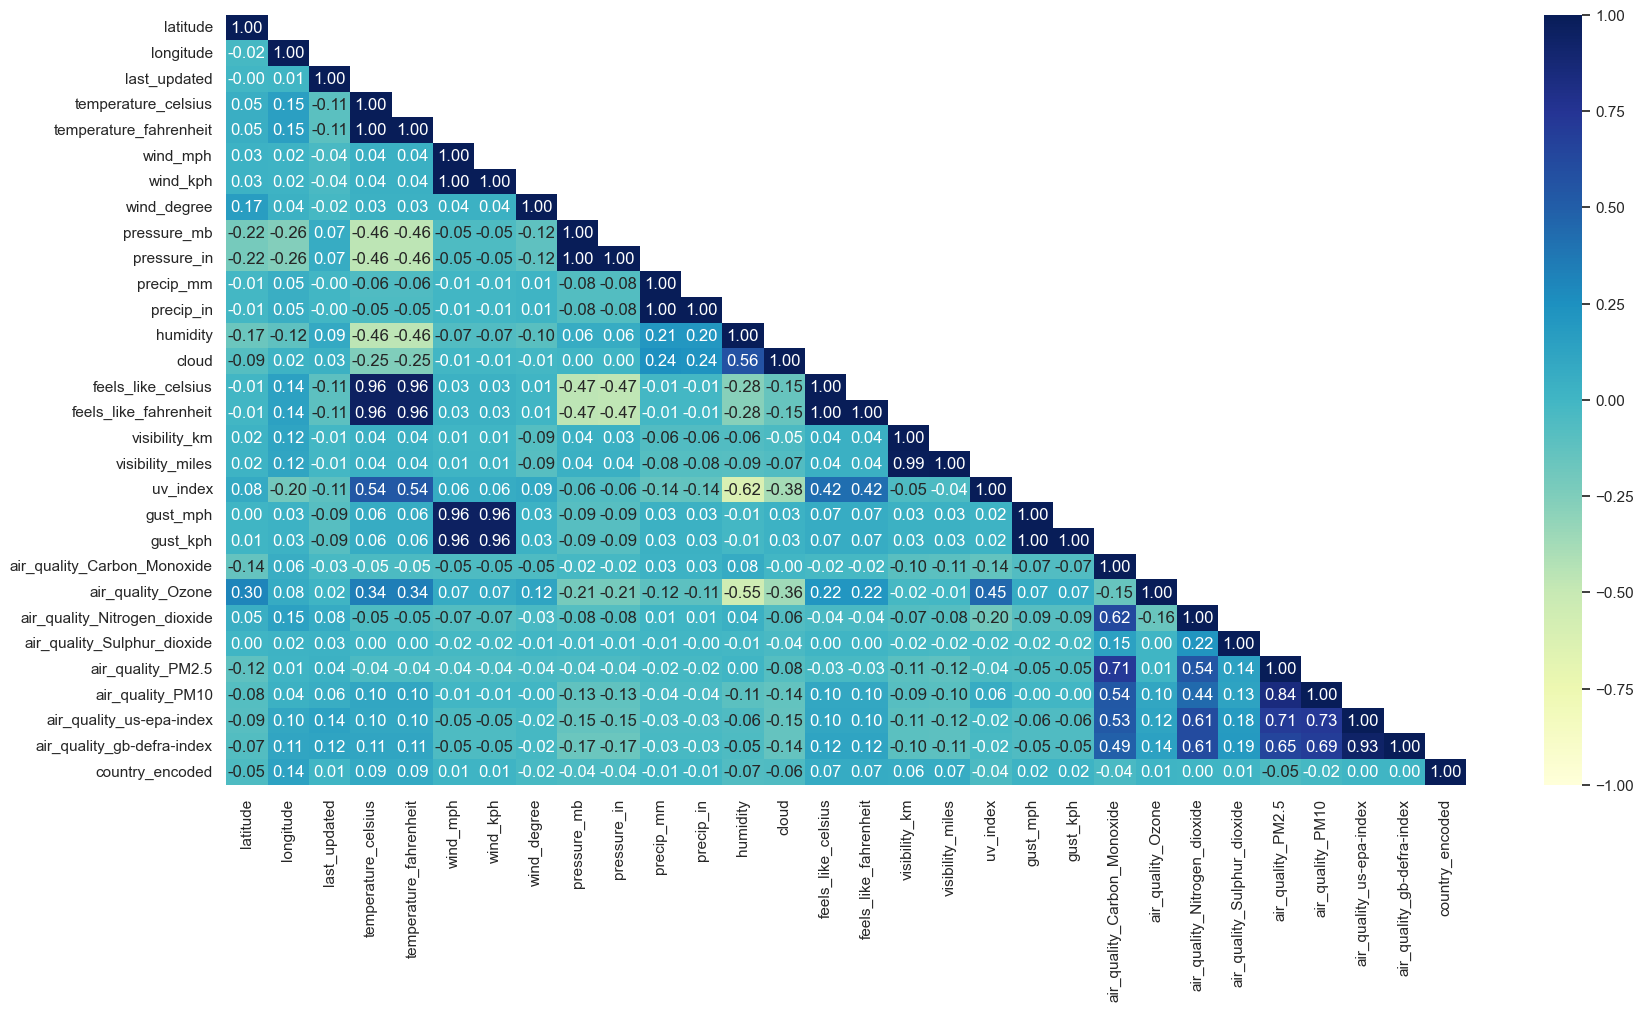

In [858]:
# Plotting a heatmap

corr = df_hot_enconded.corr()
corr_matrix = df_hot_enconded.corr()
plt.figure(figsize=(20,10))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
heat_map = sns.heatmap(corr, mask=mask, annot=True, vmax=1, vmin=-1, fmt='.2f',cmap='YlGnBu')


I have decided to encode the 'country' feature so I could plot the heatmap and then clean even more the dataset, through this heat map I can see there are still redundant columns, for instance, the wind speed, in km and mph, or the temperature, I will keep the speed in km and temperature in celcius. In addition, columns which has no strong correlation will be dropped as well.

In [859]:
# Dropping columns
df = df_hot_enconded.drop(['temperature_fahrenheit', 'wind_mph', 'pressure_mb', 'pressure_in', 'feels_like_fahrenheit', 'visibility_miles', 'gust_mph','air_quality_Nitrogen_dioxide',
              'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'precip_in'], axis=1)

## Handling Outliers

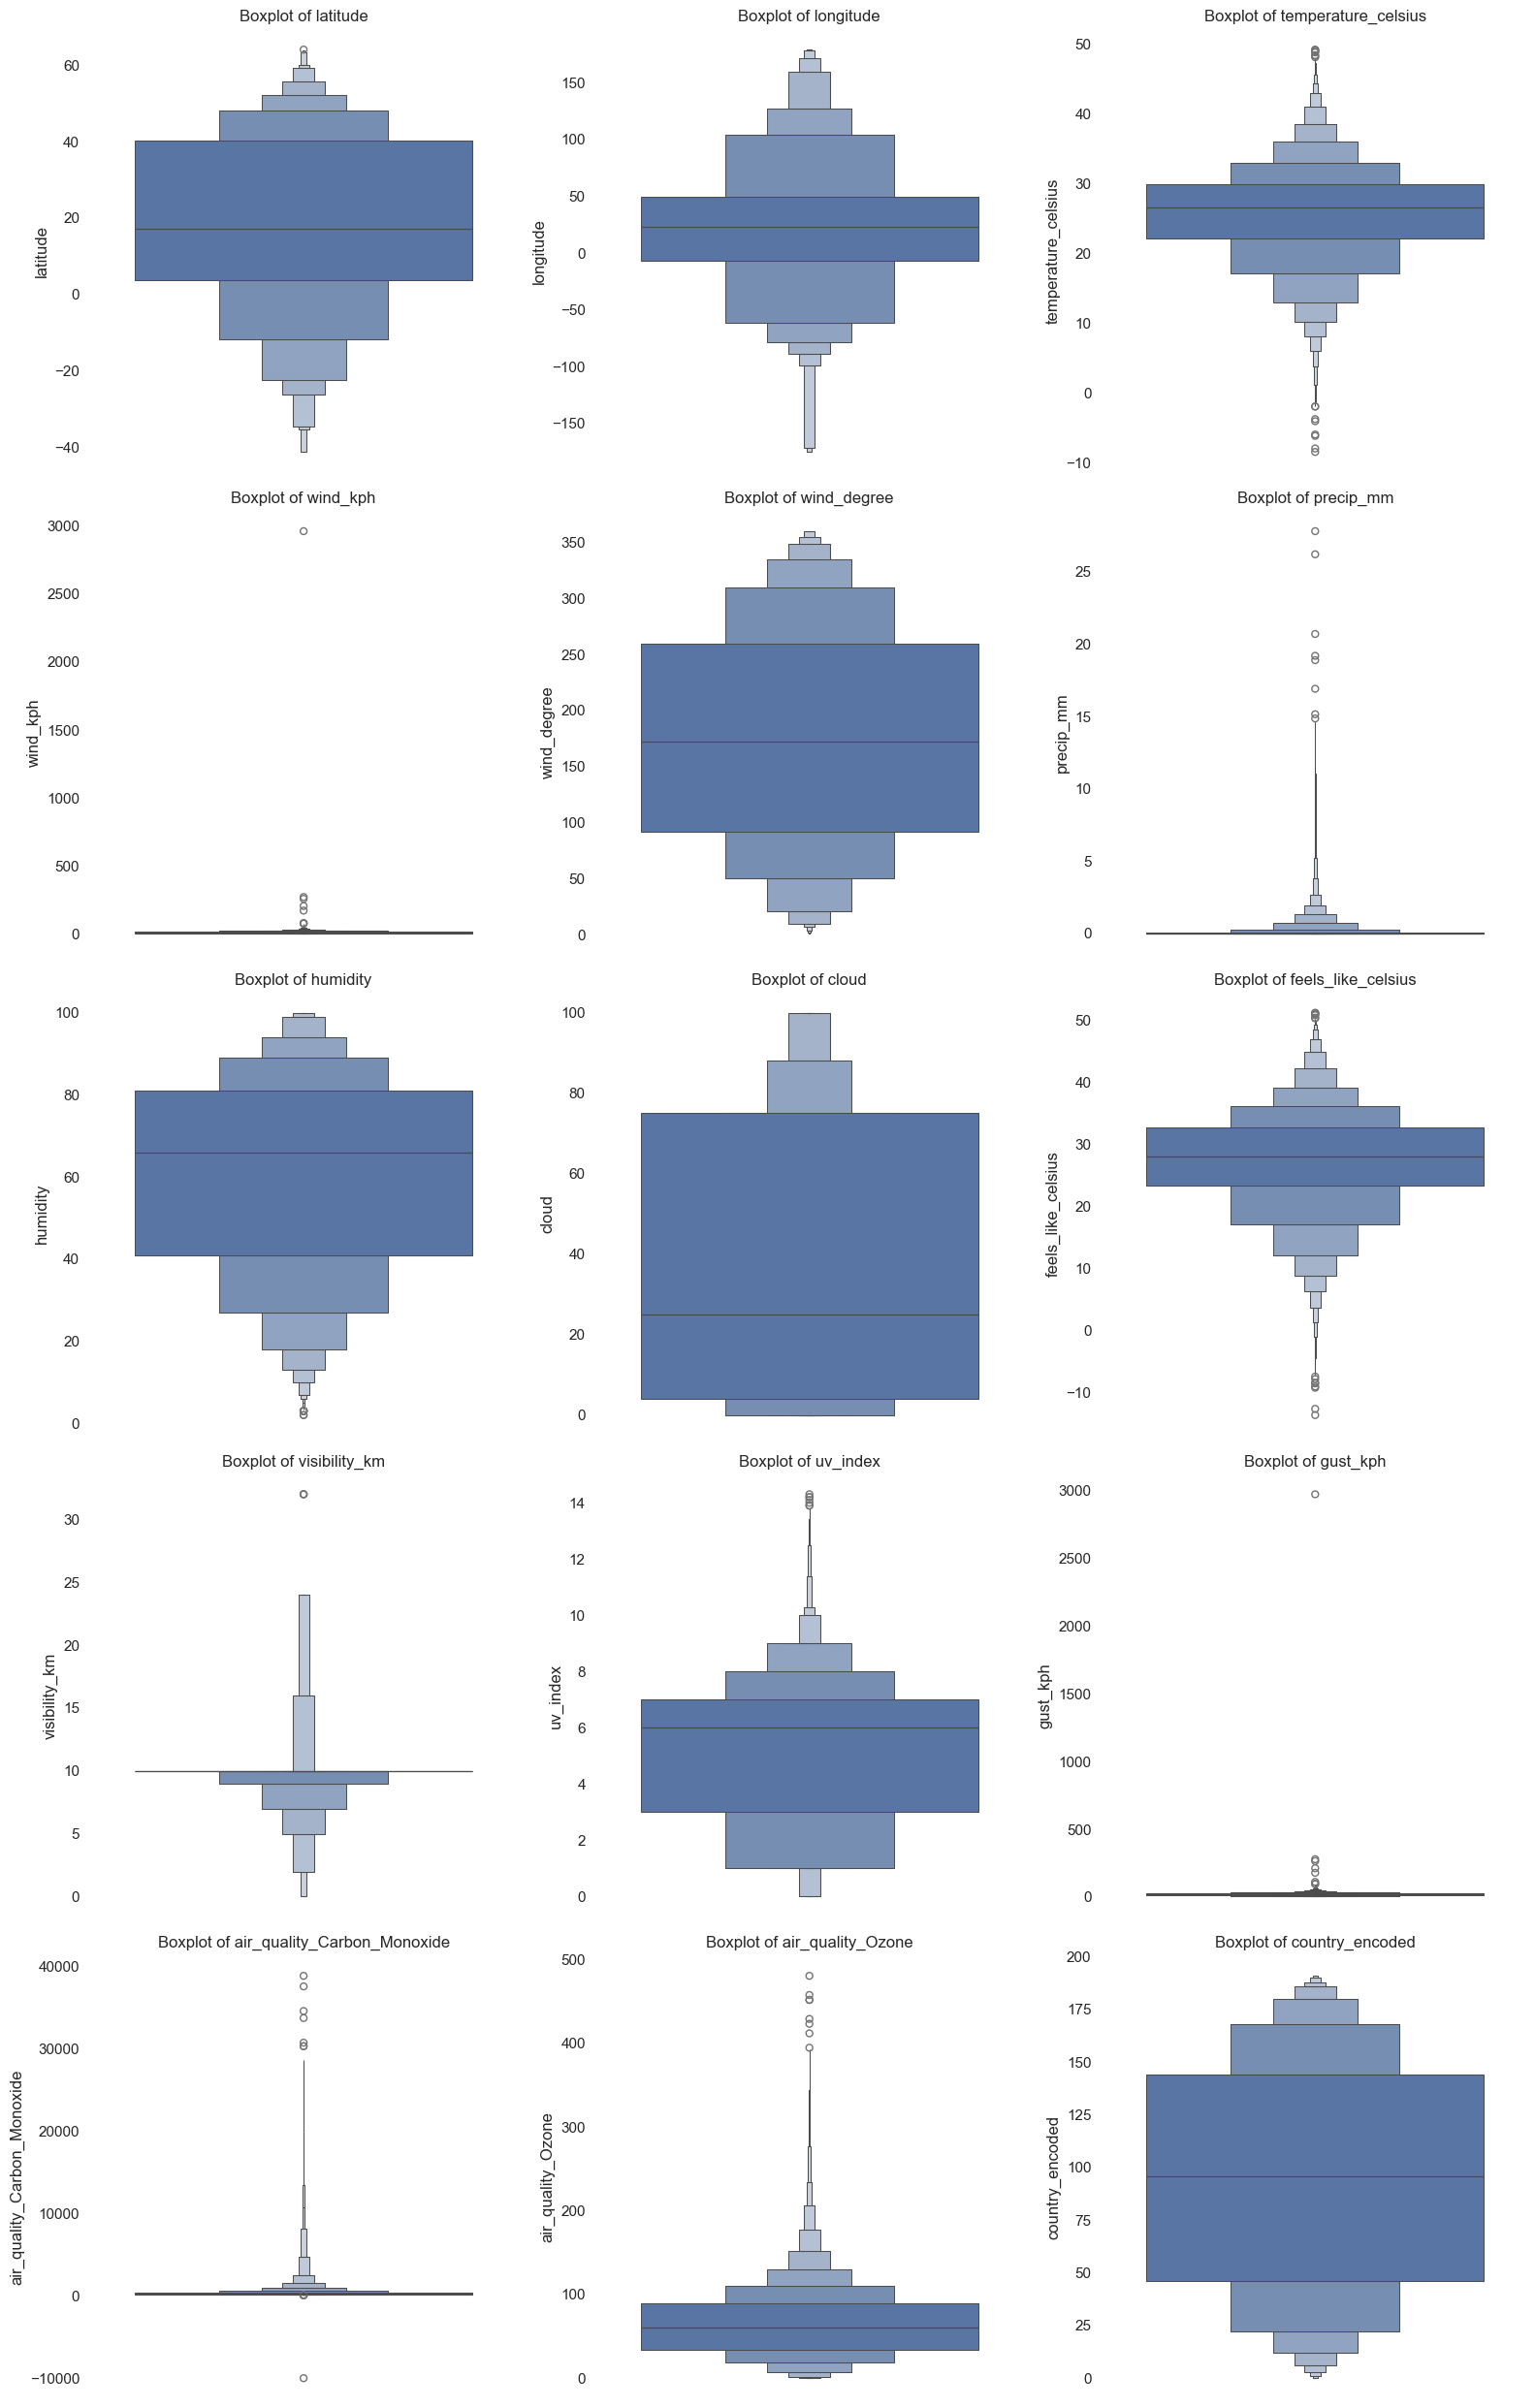

In [860]:
# Checking for outliers in the numeric columns using boxplot

columns_numeric = df.select_dtypes(include=['Float64', 'int64'])

# Defining the numbers of columns and rows for the graphics
num_cols = 3
num_plot = len(columns_numeric.columns)
num_rows = (num_plot + num_cols - 1) // num_cols

# Difining figure and axes
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 5 *num_rows))
axs = axs.flatten()

# Looping through the numercs columns
for i, col in enumerate(columns_numeric):
    sns.boxenplot(y=df[col].dropna(), ax=axs[i])
    axs[i].set_title(f"Boxplot of {col}")
    axs[i].set_ylabel(col)
    

# eliminating the axes unutilized
for i in range(num_plot, len(axs)):
    fig.delaxes(axs[i])
    
# Ajusting the layout and plotting
plt.tight_layout()
plt.show()

In [861]:
# Getting back to the data frame the 'county'column
df['country'] = country_column

# Getting the first 5 rows of the data frame to se if it workesd
df.head()

,latitude,longitude,last_updated,temperature_celsius,wind_kph,wind_degree,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,country_encoded,country
0,34.52,69.18,2024-05-16 13:15:00,26.6,13.3,338,0.0,24,30,25.3,10.0,7.0,15.3,277.0,103.0,0,Afghanistan
1,41.33,19.82,2024-05-16 10:45:00,19.0,11.2,320,0.1,94,75,19.0,10.0,5.0,18.4,193.6,97.3,1,Albania
2,36.76,3.05,2024-05-16 09:45:00,23.0,15.1,280,0.0,29,0,24.6,10.0,5.0,22.3,540.7,12.2,2,Algeria
3,42.50,1.52,2024-05-16 10:45:00,6.3,11.9,215,0.3,61,100,3.8,2.0,2.0,13.7,170.2,64.4,3,Andorra
4,-8.84,13.23,2024-05-16 09:45:00,26.0,13.0,150,0.0,89,50,28.7,10.0,8.0,20.2,2964.0,19.0,4,Angola


In [862]:
# Applying the interquartile range system to selec and drop the outliers in column 'wind_kph'

Q1= df['wind_kph'].quantile(0.25)
Q3= df['wind_kph'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_cleaned = df[(df['wind_kph'] >= lower) & (df['wind_kph'] <= upper)]

In [863]:
# Applying the interquartile range system to selec and drop the outliers in column 'visibility_km'
Q1= df['visibility_km'].quantile(0.25)
Q3= df['visibility_km'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_cleaned = df[(df['visibility_km'] >= lower) & (df['visibility_km'] <= upper)]

In [864]:
# Applying the interquartile range system to selec and drop the outliers in column 'gust_kph'
Q1= df['gust_kph'].quantile(0.25)
Q3= df['gust_kph'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_cleaned = df[(df['gust_kph'] >= lower) & (df['gust_kph'] <= upper)]

In [865]:
# Cheking the number of features and observations of the cleaned dataset
df_cleaned.shape

(29764, 17)

After plotting the boxplot, I detected 3 features containing outliers. Thus, I used the interquartile range technique to eliminate the outliers in those columns. This statistical technique consists of taking the difference between the third quartile and the first one from a group of data then it measures the central dispersion of the data, eliminating the outliers. (Hleap, 2024)

## Storing the clean dataset in a new file

In [866]:
# Exporting the dataset for a new csv file

df_cleaned.to_csv('/Users/diegolemos/Masters/ProgrammingForAi/CA/Cleaned_Global_Weather.csv', index=False)

In [867]:
# Reading and assigning the new dataset to the 'df' vatiable
df_weather = pd.read_csv('/Users/diegolemos/Masters/ProgrammingForAi/CA/Cleaned_Global_Weather.csv')

In [868]:
# Reading the 5 first rows of the dataset
df_weather.head()

,latitude,longitude,last_updated,temperature_celsius,wind_kph,wind_degree,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,country_encoded,country
0,34.52,69.18,2024-05-16 13:15:00,26.6,13.3,338,0.0,24,30,25.3,10.0,7.0,15.3,277.0,103.0,0,Afghanistan
1,41.33,19.82,2024-05-16 10:45:00,19.0,11.2,320,0.1,94,75,19.0,10.0,5.0,18.4,193.6,97.3,1,Albania
2,36.76,3.05,2024-05-16 09:45:00,23.0,15.1,280,0.0,29,0,24.6,10.0,5.0,22.3,540.7,12.2,2,Algeria
3,42.50,1.52,2024-05-16 10:45:00,6.3,11.9,215,0.3,61,100,3.8,2.0,2.0,13.7,170.2,64.4,3,Andorra
4,-8.84,13.23,2024-05-16 09:45:00,26.0,13.0,150,0.0,89,50,28.7,10.0,8.0,20.2,2964.0,19.0,4,Angola


## Measures of Variability

In [869]:
# Displying the summary of the key statistics features
df_weather.describe()

,latitude,longitude,temperature_celsius,wind_kph,wind_degree,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,country_encoded
count,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000,29764.000000
mean,19.160692,21.942271,25.729153,13.307361,175.640069,0.152658,60.973357,38.642723,27.307160,9.773421,5.298239,19.493391,463.961074,64.659454,94.799456
std,24.376179,65.318143,7.112314,7.660297,100.025001,0.578329,24.999931,32.612456,8.444335,2.287390,2.779756,9.789464,1076.823217,42.457907,56.134703
min,-41.300000,-175.200000,-8.400000,3.600000,1.000000,0.000000,2.000000,0.000000,-13.600000,0.000000,0.000000,3.600000,-9999.000000,0.000000,0.000000
25%,3.750000,-6.250000,22.100000,6.800000,92.000000,0.000000,41.000000,4.000000,23.500000,10.000000,3.000000,11.300000,205.300000,34.000000,46.000000
50%,17.250000,23.320000,26.600000,11.900000,172.000000,0.000000,66.000000,25.000000,28.000000,10.000000,6.000000,18.400000,264.550000,60.000000,96.000000
75%,40.400000,49.880000,30.000000,19.100000,259.000000,0.030000,81.000000,75.000000,32.700000,10.000000,7.000000,26.300000,403.300000,90.000000,145.000000
max,64.150000,179.220000,49.200000,46.100000,360.000000,19.200000,100.000000,100.000000,51.200000,32.000000,14.300000,48.500000,38879.398000,480.700000,191.000000


Using the function .describe() to obtain the distribution of variables, including mean, median, min, max, and the different quartiles. Transpose used to provide a better visualisation. (pandas.pydata.org, n.d.)

# Data Analytics and Visualization

In [870]:
# Grouping the max temperatures per country
max_temperatures = df_weather.groupby('country')['temperature_celsius'].max().reset_index()

# Naming the max temperature's column
max_temperatures.columns = ['country', 'country_max_temperature']



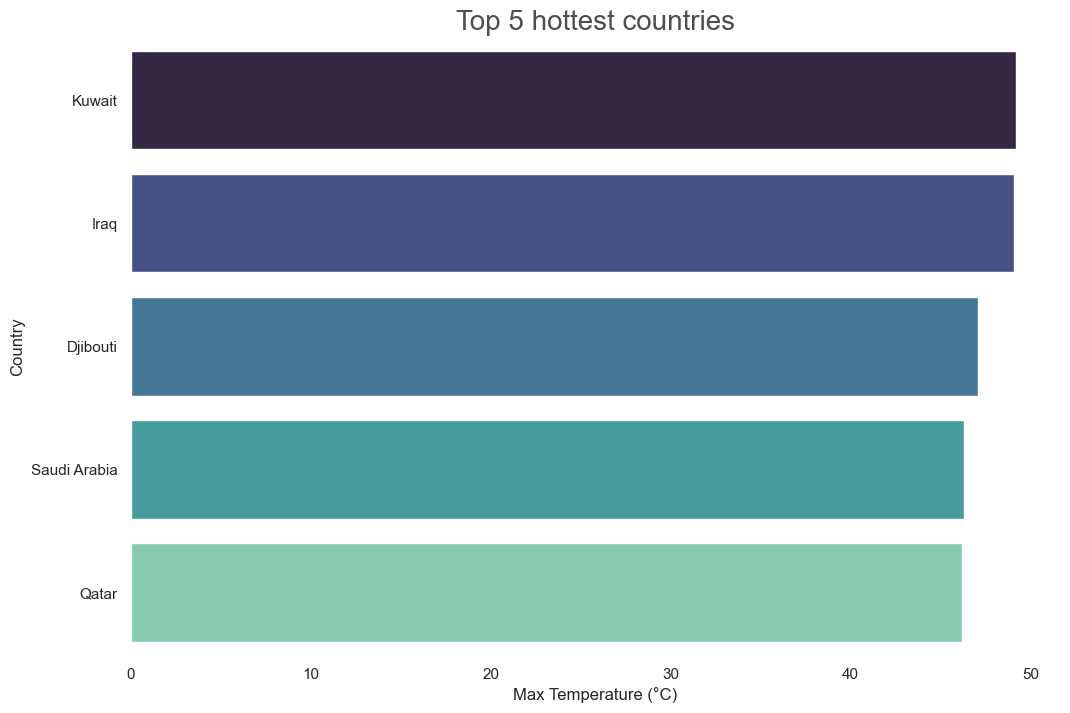

In [871]:
#Setting the values to plot and the index:
hottest_countries = max_temperatures.nlargest(5,'country_max_temperature').set_index('country')
#Setting the background color:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#Size of figure:
plt.figure(figsize=(12,8))
#Title:
plt.title('Top 5 hottest countries', size=20, color='#4f4e4e')
#plotting the graphic:
barplot = sns.barplot(x=hottest_countries['country_max_temperature'], y=hottest_countries.index, palette="mako")
#showing the graphic:
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Country')
plt.show()

In [872]:
# Grouping the min temperatures per country
min_temperatures = df_weather.groupby('country')['temperature_celsius'].min().reset_index()

# Naming the min temperature's column
min_temperatures.columns = ['country', 'country_min_temperature']

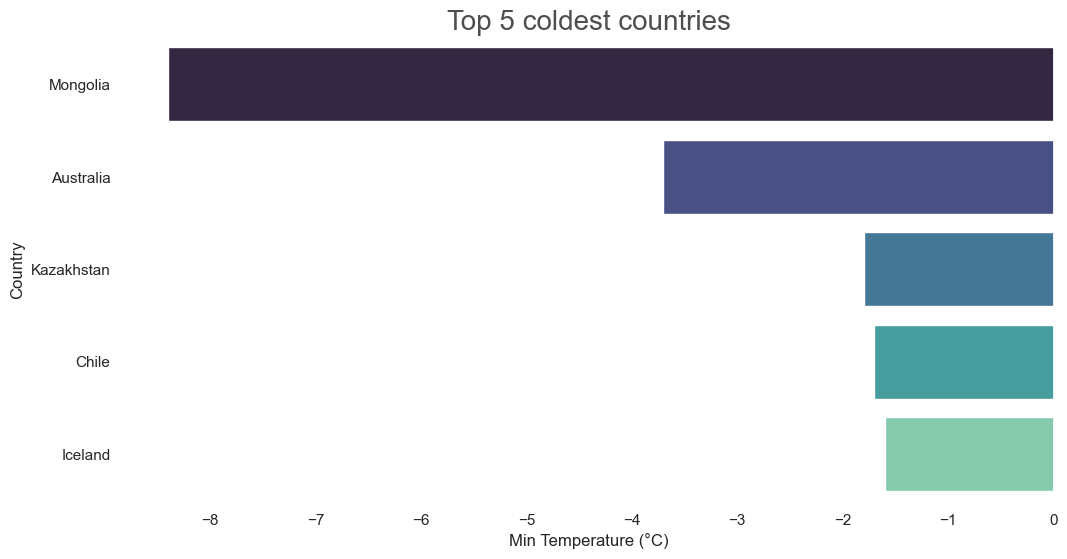

In [873]:
#Setting the values to plot and the index:
coldest_countries = min_temperatures.nsmallest(5,'country_min_temperature').set_index('country')
#Setting the background color:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#Size of figure:
plt.figure(figsize=(12,6))
#Title:
plt.title('Top 5 coldest countries', size=20, color='#4f4e4e')
#plotting the graphic:
barplot = sns.barplot(x=coldest_countries['country_min_temperature'], y=coldest_countries.index, palette="mako")
#showing the graphic:
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Country')
plt.show()

In [874]:
# Grouping the max humidity per country
max_humidity = df_weather.groupby('country')['humidity'].min().reset_index()

# Naming the min temperature's column
max_humidity.columns = ['country', 'country_max_humidity']

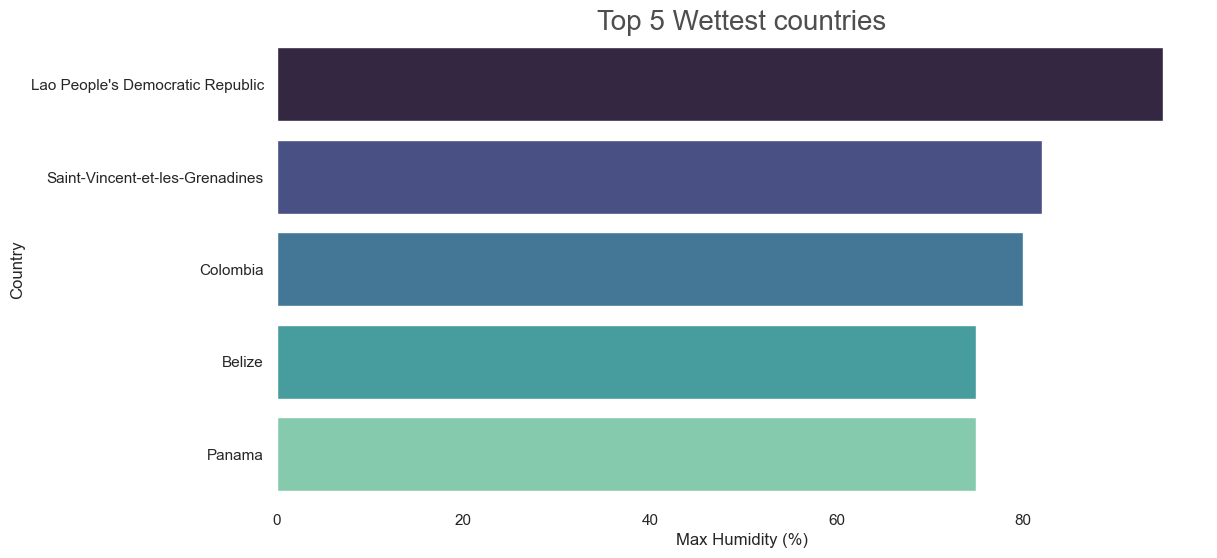

In [875]:
#Setting the values to plot and the index:
wettest_countries = max_humidity.nlargest(5,'country_max_humidity').set_index('country')
#Setting the background color:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#Size of figure:
plt.figure(figsize=(12,6))
#Title:
plt.title('Top 5 Wettest countries', size=20, color='#4f4e4e')
#plotting the graphic:
barplot = sns.barplot(x=wettest_countries['country_max_humidity'], y=wettest_countries.index, palette="mako")
#showing the graphic:
plt.xlabel('Max Humidity (%)')
plt.ylabel('Country')
plt.show()

In [876]:
# Grouping the max humidity per country
min_humidity = df_weather.groupby('country')['humidity'].min().reset_index()

# Naming the min temperature's column
min_humidity.columns = ['country', 'country_min_humidity']

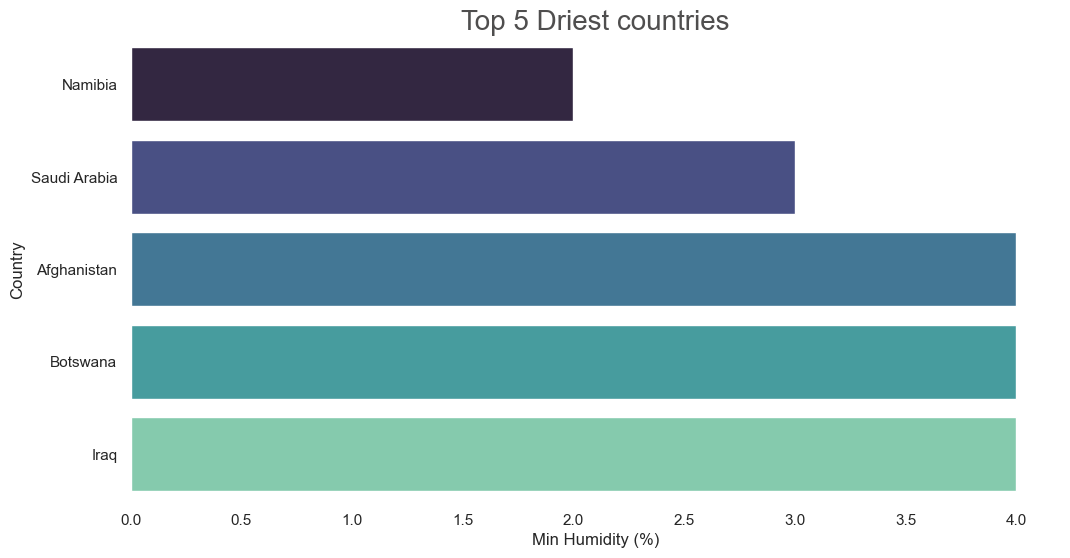

In [877]:
#Setting the values to plot and the index:
driest_countries = min_humidity.nsmallest(5,'country_min_humidity').set_index('country')
#Setting the background color:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#Size of figure:
plt.figure(figsize=(12,6))
#Title:
plt.title('Top 5 Driest countries', size=20, color='#4f4e4e')
#plotting the graphic:
barplot = sns.barplot(x=driest_countries['country_min_humidity'], y=driest_countries.index, palette="mako")
#showing the graphic:
plt.xlabel('Min Humidity (%)')
plt.ylabel('Country')
plt.show()

I have plotted above the top five max temperatures, min temperature, max humidity, and min humidity per country, and as we can see, despite how intuitive it is to think that the hottest would be the one with less humidity or the couldest would be the one more humid. Thus as the bar plot shows, the hottiest country, Kuwait is not even on the top driest countries list, and the same happens with Mongolia which is shown as the couldest country but is not listed on the top 5 wettest countries. 

In [878]:
# Getting the month from the 'last_updated' column as there is just one year in the entries for this dataset
df_weather['last_updated'] = pd.to_datetime(df_weather['last_updated'])
df_weather['month'] = df_weather['last_updated'].dt.month



In [886]:
# Grouping data in a dictionary to use in the visualization

# Function to get the continet from the country name
def country_to_continent(country):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

# Applying the function 
df_weather['continent'] = df_weather['country'].apply(country_to_continent)

# Grouping the measuments
grouped_by_continent = df_weather.groupby('continent').agg({
    'temperature_celsius' : ['mean', 'max', 'min', 'std'],
    'humidity' : ['mean', 'max', 'min', 'std'],
    'precip_mm' : ['mean', 'max', 'min', 'std'],
    'uv_index' : ['mean', 'max', 'min', 'std'],
    'air_quality_Ozone' : ['mean', 'max', 'min', 'std']
}).reset_index()

# Using numpy
grouped_by_continent['std_dev_temp'] = np.std(df_weather.groupby('continent')['temperature_celsius'].max())

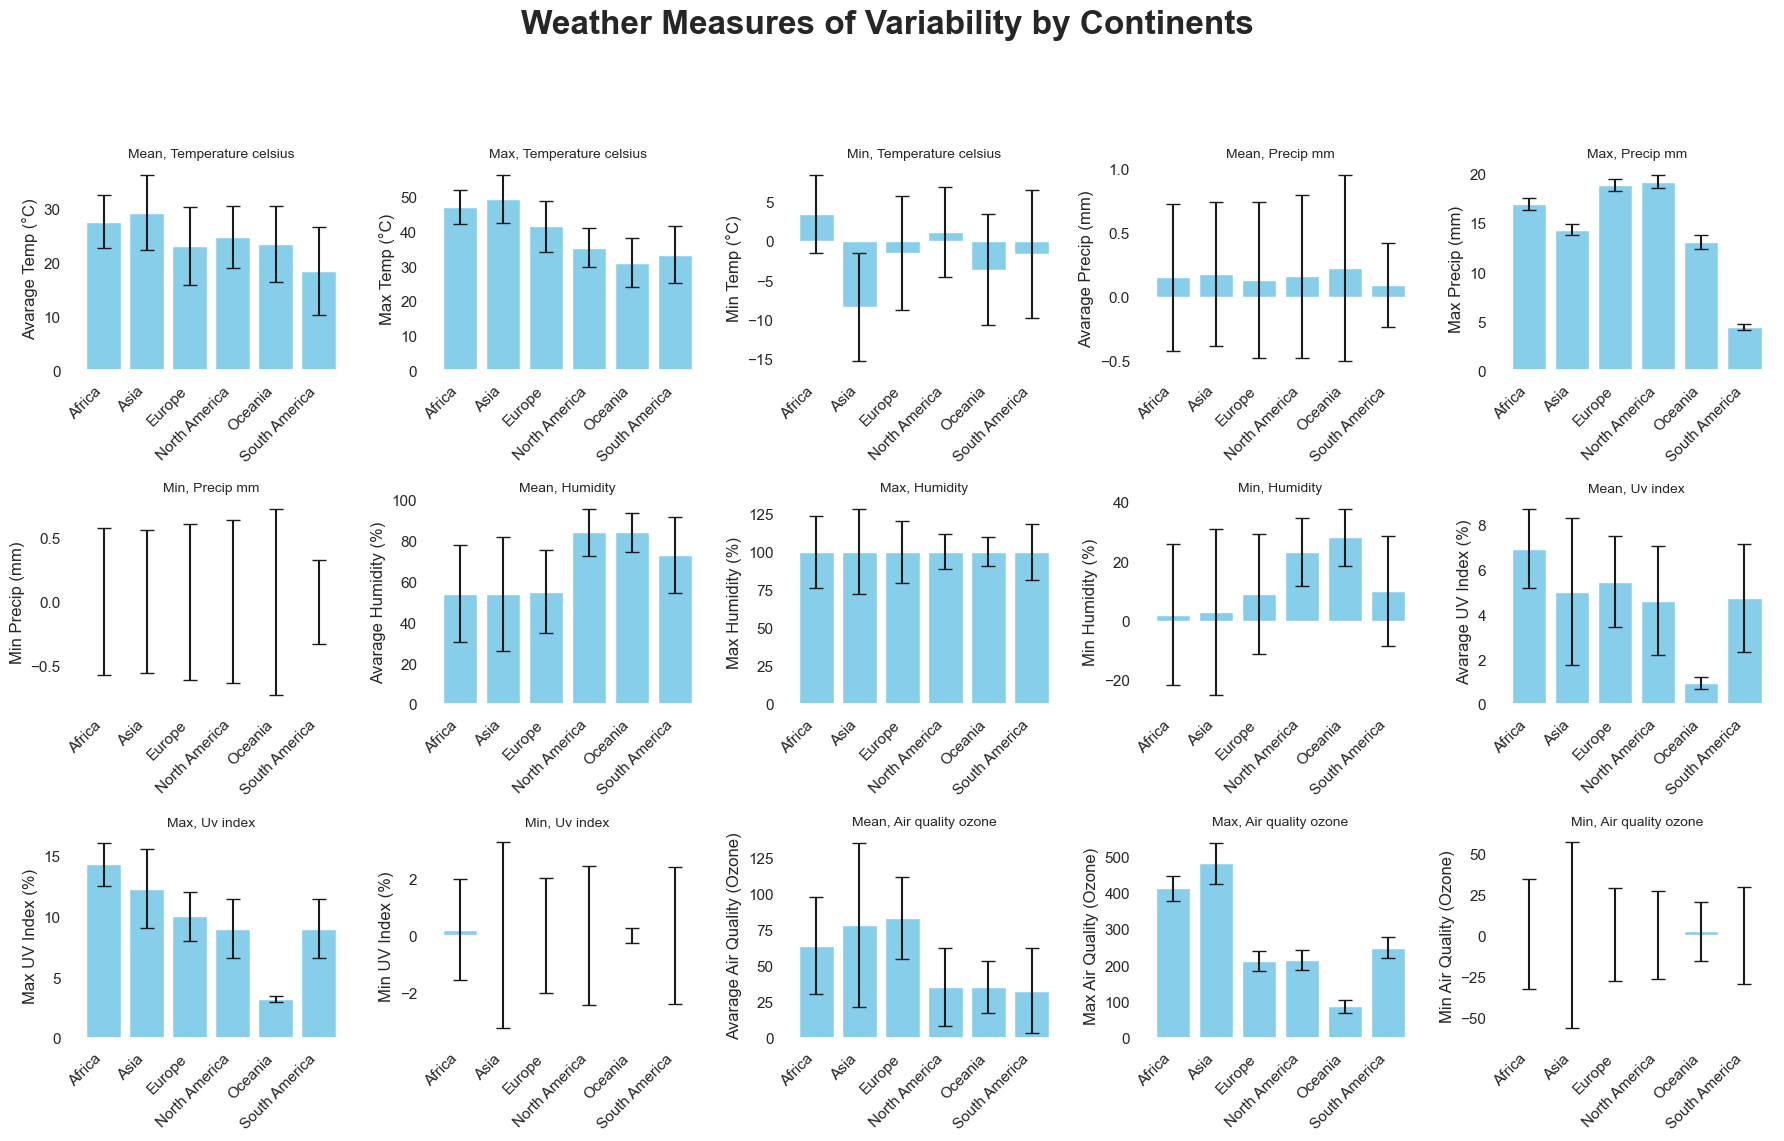

In [897]:
# Droping the 'Unknown' countries as it can mislead the analysis
grouped_by_continent=grouped_by_continent.drop(grouped_by_continent[grouped_by_continent['continent'] == 'Unknown'].index)

# Visualization set up
def plot_hist(row, col, metric, agg_func, ax, ylabel):
    ax.bar(grouped_by_continent['continent'], grouped_by_continent[(metric, agg_func)], color= 'skyblue',
           yerr=grouped_by_continent[(metric, 'std')], capsize=5)
    ax.set_title(f'{agg_func.capitalize()}, {metric.replace("_", " ").capitalize()}', fontsize=10)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(grouped_by_continent['continent'], rotation=45, ha='right')

fig, ax = plt.subplots(3, 5, figsize=(18, 12))
fig.suptitle('Weather Measures of Variability by Continents \n', fontsize=24, fontweight='bold')

# Plotting the measuments
plot_hist(0,0, 'temperature_celsius', 'mean', ax[0, 0], 'Avarage Temp (°C)')
plot_hist(0,1, 'temperature_celsius', 'max', ax[0, 1], 'Max Temp (°C)')
plot_hist(0,2, 'temperature_celsius', 'min', ax[0, 2], 'Min Temp (°C)')
plot_hist(0,3, 'precip_mm', 'mean', ax[0, 3], 'Avarage Precip (mm)')
plot_hist(0,4, 'precip_mm', 'max', ax[0, 4], 'Max Precip (mm)')
plot_hist(1,0, 'precip_mm', 'min', ax[1, 0], 'Min Precip (mm)')
plot_hist(1,1, 'humidity', 'mean', ax[1, 1], 'Avarage Humidity (%)')
plot_hist(1,2, 'humidity', 'max', ax[1, 2], 'Max Humidity (%)')
plot_hist(1,3, 'humidity', 'min', ax[1, 3], 'Min Humidity (%)')
plot_hist(1,4, 'uv_index', 'mean', ax[1, 4], 'Avarage UV Index (%)')
plot_hist(2,0, 'uv_index', 'max', ax[2, 0], 'Max UV Index (%)')
plot_hist(2,1, 'uv_index', 'min', ax[2, 1], 'Min UV Index (%)')
plot_hist(2,2, 'air_quality_Ozone', 'mean', ax[2, 2], 'Avarage Air Quality (Ozone)')
plot_hist(2,3, 'air_quality_Ozone', 'max', ax[2, 3], 'Max Air Quality (Ozone)')
plot_hist(2,4, 'air_quality_Ozone', 'min', ax[2, 4], 'Min Air Quality (Ozone)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

on the histograms plotted above, we can get a few insights, as por example 

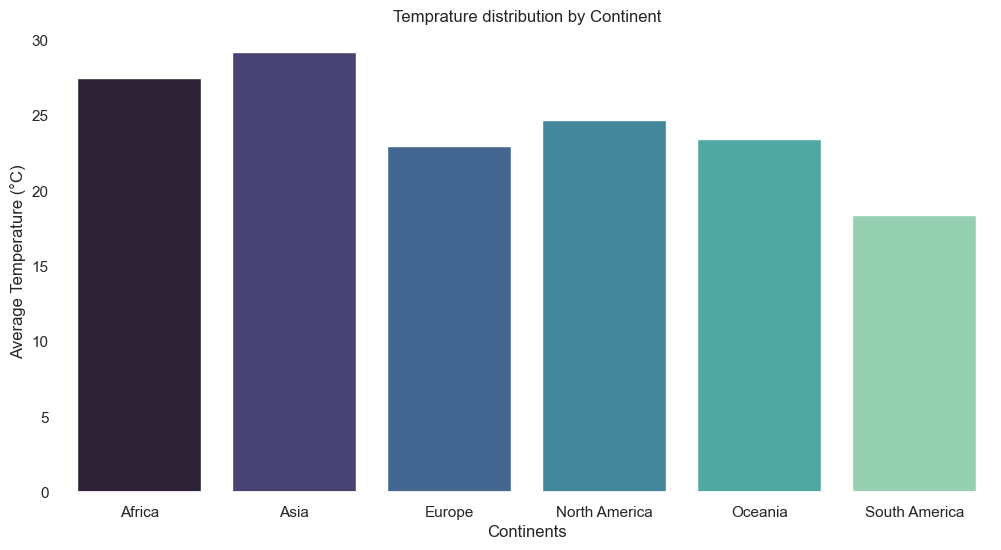

In [898]:
# Creating the column 'temperature_celsius_mean'
grouped_by_continent['temperature_celsius_mean'] = grouped_by_continent[('temperature_celsius', 'mean')]
# Plotting set up
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_by_continent, x='continent', y='temperature_celsius_mean', palette='mako')
# Plotting
plt.title('Temprature distribution by Continent')
plt.xlabel('Continents')
plt.ylabel('Average Temperature (°C)')
plt.show()


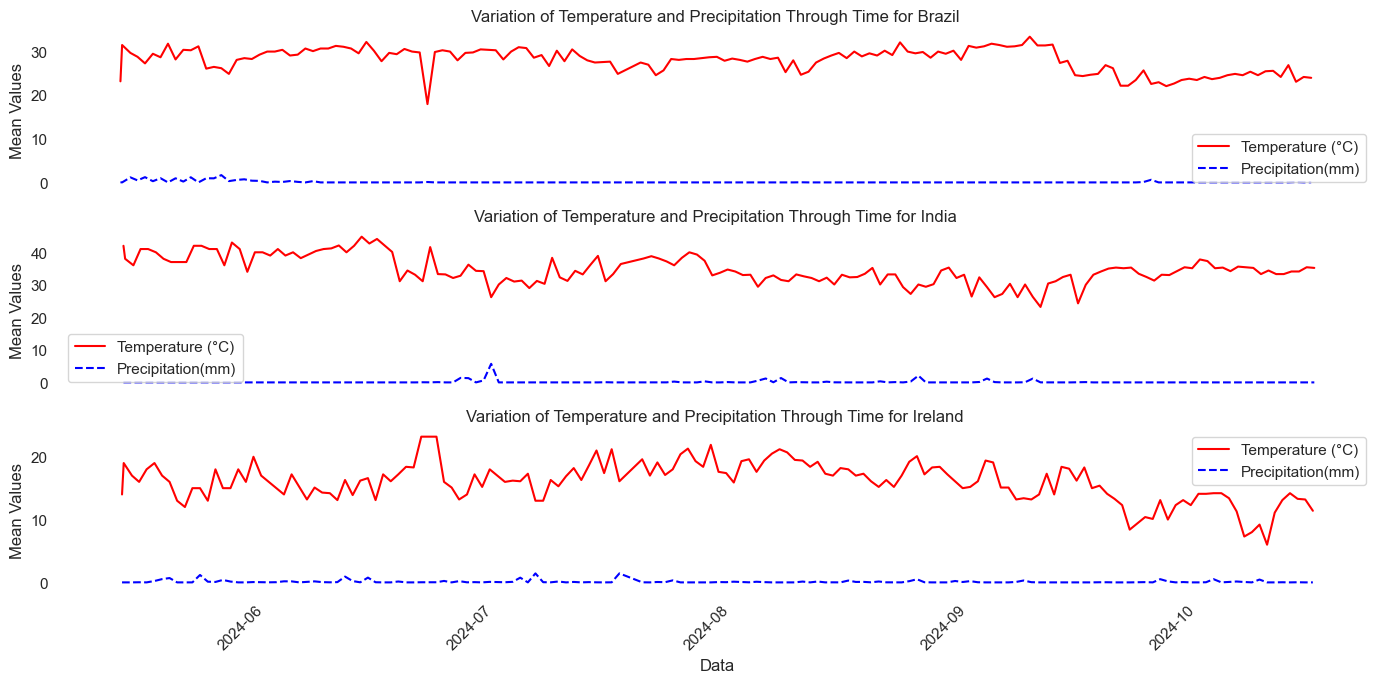

In [899]:
# Choosing contries
countries = ['Brazil', 'India', 'Ireland']

# Plotting set up
fig, axs = plt.subplots(len(countries), figsize=(14, 7), sharex=True)

# Getting the measures for each country to be plotted
for i, country in enumerate(countries):
    country_set = df_weather[df_weather['country'] == country]
    
    sns.lineplot(data = country_set, x='last_updated', y = 'temperature_celsius', ax=axs[i], label = 'Temperature (°C)', color='red')
    
    sns.lineplot(data = country_set, x='last_updated', y = 'precip_mm', ax=axs[i], label = 'Precipitation(mm)', color='blue', linestyle='--')
    
    axs[i].set_title(f'Variation of Temperature and Precipitation Through Time for {country} ')
    axs[i].set_ylabel('Mean Values')
    axs[i].legend()

# Plotting
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


